In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
sample_submission_path = "sample_submission.csv"
store_path = "store.csv"
test_path = "test.csv"
train_path ="train.csv"

# Read the files
sample_submission = pd.read_csv(sample_submission_path)
store = pd.read_csv(store_path)
test = pd.read_csv(test_path)
train =pd.read_csv(train_path)

# Display basic info about the datasets
summary = {
    "sample_submission": {
        "shape": sample_submission.shape,
        "columns": sample_submission.columns.tolist(),
        "missing_values": sample_submission.isnull().sum().to_dict(),
    },
    "store": {
        "shape": store.shape,
        "columns": store.columns.tolist(),
        "missing_values": store.isnull().sum().to_dict(),
    },
    "test": {
        "shape": test.shape,
        "columns": test.columns.tolist(),
        "missing_values": test.isnull().sum().to_dict(),
    },
      "train": {
        "shape": train.shape,
        "columns": train.columns.tolist(),
        "missing_values": train.isnull().sum().to_dict(),
    },
}

summary



C:\Users\lenovo\AppData\Local\Temp\ipykernel_4976\766918915.py:14: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  store = pd.read_csv(store_path)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_4976\766918915.py:16: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train =pd.read_csv(train_path)


{'sample_submission': {'shape': (41088, 2),
  'columns': ['Id', 'Sales'],
  'missing_values': {'Id': 0, 'Sales': 0}},
 'store': {'shape': (1017209, 31),
  'columns': ['Store',
   'DayOfWeek',
   'Date',
   'Sales',
   'Customers',
   'Open',
   'Promo',
   'StateHoliday',
   'SchoolHoliday',
   'HolidayPeriod',
   'Month',
   'Year',
   'Sales_per_Customer',
   'prev_open',
   'next_open',
   'is_opening_day',
   'is_closing_day',
   'Weekday',
   'AllWeekdayOpen',
   'StoreType',
   'Assortment',
   'CompetitionDistance',
   'CompetitionOpenSinceMonth',
   'CompetitionOpenSinceYear',
   'Promo2',
   'Promo2SinceWeek',
   'Promo2SinceYear',
   'PromoInterval',
   'WeekOfYear',
   'IsWeekend',
   'IsHoliday'],
  'missing_values': {'Store': 0,
   'DayOfWeek': 0,
   'Date': 0,
   'Sales': 0,
   'Customers': 0,
   'Open': 0,
   'Promo': 0,
   'StateHoliday': 0,
   'SchoolHoliday': 0,
   'HolidayPeriod': 0,
   'Month': 0,
   'Year': 0,
   'Sales_per_Customer': 172869,
   'prev_open': 1115,


In [6]:
train = pd.read_csv("train.csv")  # Make sure to load the train dataset
train['Date'] = pd.to_datetime(train['Date'], format='%Y-%m-%d')


C:\Users\lenovo\AppData\Local\Temp\ipykernel_9656\2547278443.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("train.csv")  # Make sure to load the train dataset


In [2]:
print(store.columns.tolist())


['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'HolidayPeriod', 'Month', 'Year', 'Sales_per_Customer', 'prev_open', 'next_open', 'is_opening_day', 'is_closing_day', 'Weekday', 'AllWeekdayOpen', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'WeekOfYear', 'IsWeekend', 'IsHoliday']


- Handle missing values in store.csv and test.csv
- Convert Date column to datetime format
-Merge datasets for better analysis
-Perform exploratory data analysis (

In [3]:
# ----- Cleaning the store dataset -----
# Fill missing CompetitionDistance values with the median value
median_competition_distance = store['CompetitionDistance'].median()
store['CompetitionDistance'].fillna(median_competition_distance, inplace=True)

# For CompetitionOpenSinceMonth and CompetitionOpenSinceYear, missing values might indicate no competition,
# so we can fill missing values with 0 (or a distinct value that indicates 'no data')
store['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
store['CompetitionOpenSinceYear'].fillna(0, inplace=True)

# For Promo2SinceWeek and Promo2SinceYear, fill missing values with 0 to indicate no Promo2 history
store['Promo2SinceWeek'].fillna(0, inplace=True)
store['Promo2SinceYear'].fillna(0, inplace=True)

# For PromoInterval, missing values can be replaced with 'None'
store['PromoInterval'].fillna('None', inplace=True)

# ----- Cleaning the test dataset -----
# Convert 'Date' to datetime format
test['Date'] = pd.to_datetime(test['Date'], format='%Y-%m-%d')
train['Date'] = pd.to_datetime(train['Date'], format='%Y-%m-%d')

# For 'Open', fill missing values with the mode (most frequent value) or assume store was open (1)
if test['Open'].isnull().sum() > 0:
    mode_open = test['Open'].mode()[0]
    test['Open'].fillna(mode_open, inplace=True)

# ----- Merging the datasets -----
# Merge test with store information on 'Store'
merged_data = pd.merge(test, store, on='Store', how='left')

# Display a summary of the merged data
print("Merged Data Shape:", merged_data.shape)
print("Merged Data Columns:", merged_data.columns.tolist())
print(merged_data.head())


C:\Users\lenovo\AppData\Local\Temp\ipykernel_4976\2409447637.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store['CompetitionDistance'].fillna(median_competition_distance, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_4976\2409447637.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

MemoryError: Unable to allocate 1.66 GiB for an array with shape (6, 37115088) and data type object

# data was allocated before but after run again it happened

In [ ]:
print(type(train))
print(type(test))
print(type(store))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
if isinstance(store, (int,float,np.int64,np.float64)):
    store = pd.DataFrame({'store': [store]}) # convert it into a DataFrame

In [ ]:
print(train.columns)
print(test.columns)
print(store.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')
Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')
Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [ ]:
train.rename(columns={'Store': 'Store'}, inplace= True) # renamed the store columns
test.rename(columns={'Store': 'Store'}, inplace= True)
store.rename(columns={'Store': 'Store'}, inplace= True)

In [ ]:
print([col for col in train.columns if 'store' in col.lower()])
print([col for col in test.columns if 'store' in col.lower()])
print([col for col in store.columns if 'store' in col.lower()])

['Store']
['Store']
['Store', 'StoreType']


In [ ]:
# Display column names
print("Train Columns:", train.columns)
print("Store Columns:", store.columns)

Train Columns: Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')
Store Columns: Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [ ]:
print("Available columns in store.csv:", store.columns)

Available columns in store.csv: Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [ ]:
# Reduce memory usage
def reduce_memory(df):
    for col in df.columns:
        if df[col].dtype == "int64":
            df[col] = df[col].astype("int32")  # Convert int64 → int32
        elif df[col].dtype == "float64":
            df[col] = df[col].astype("float32")  # Convert float64 → float32
        elif df[col].dtype == "object":
            df[col] = df[col].astype("category")  # Convert object → category
    return df

train = reduce_memory(train)
store = reduce_memory(store)

# memory was too large so tried to reduce

In [ ]:
print(store.columns)

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


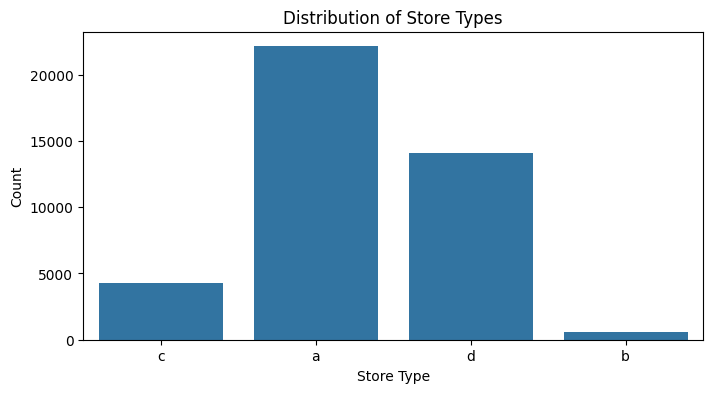

In [ ]:
# --- Plot 1: Distribution of Store Types ---
plt.figure(figsize=(8, 4))
sns.countplot(x='StoreType', data=merged_data)
plt.title('Distribution of Store Types')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()

# Store Types: Visualizing the distribution of store types can help you understand if certain store models dominate

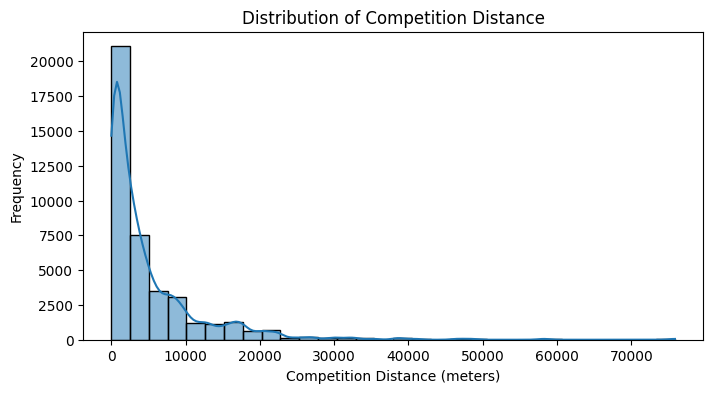

In [ ]:
# --- Plot 2: Distribution of Competition Distance ---
plt.figure(figsize=(8, 4))
sns.histplot(merged_data['CompetitionDistance'], bins=30, kde=True)
plt.title('Distribution of Competition Distance')
plt.xlabel('Competition Distance (meters)')
plt.ylabel('Frequency')
plt.show()

# Competition Distance: The histogram shows how far competitors are on average; this can later be correlated with sales

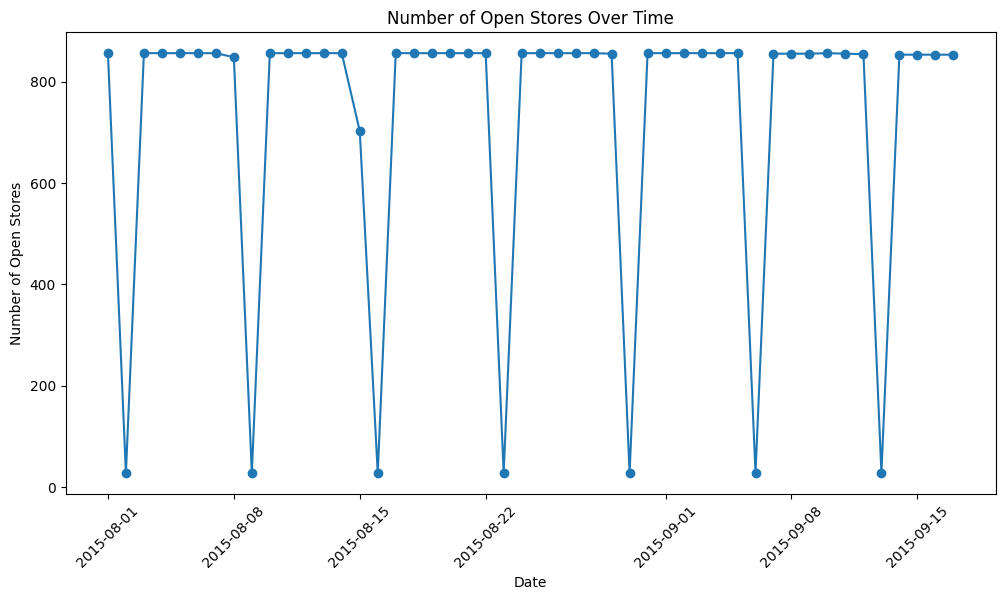

In [ ]:
# --- Plot 3: Open vs Closed Stores over Time ---
# Count the number of open stores per day
open_counts = merged_data.groupby('Date')['Open'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(open_counts['Date'], open_counts['Open'], marker='o')
plt.title('Number of Open Stores Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Open Stores')
plt.xticks(rotation=45)
plt.show()

# Open Stores Over Time: This time-series plot reveals trends in store operations, which might correspond to seasonal behavior

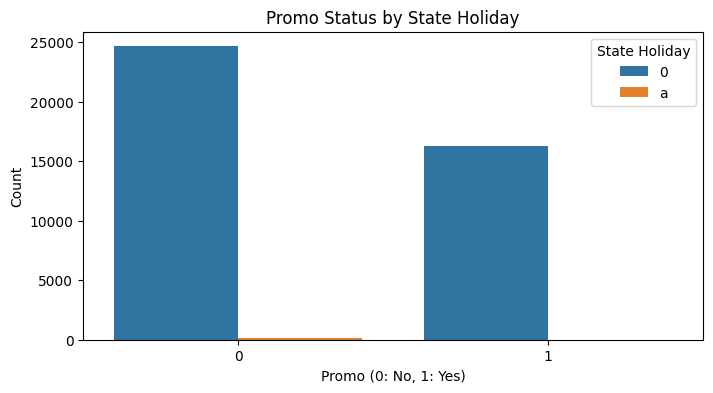

In [ ]:
# --- Plot 4: Promo Status vs. State Holiday ---
plt.figure(figsize=(8, 4))
sns.countplot(x='Promo', hue='StateHoliday', data=merged_data)
plt.title('Promo Status by State Holiday')
plt.xlabel('Promo (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='State Holiday')
plt.show()

# Promo & Holidays: Examining how promotions and state holidays overlap can provide insights into planning promo strategies

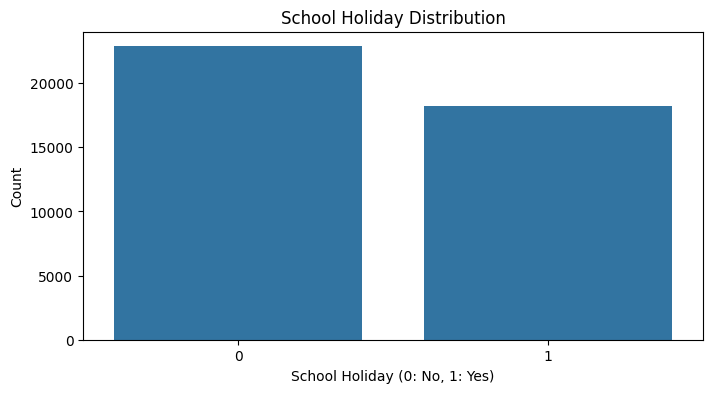

In [ ]:
# --- Plot 5: School Holiday Impact ---
plt.figure(figsize=(8, 4))
sns.countplot(x='SchoolHoliday', data=merged_data)
plt.title('School Holiday Distribution')
plt.xlabel('School Holiday (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class DateFeatureExtractor(BaseEstimator, TransformerMixin):
    """
    Transformer to extract date-related features from a date column.
    """
    def __init__(self, date_column):
        self.date_column = date_column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_ = X.copy()
        # Convert to datetime if not already
        X_[self.date_column] = pd.to_datetime(X_[self.date_column])
        # Create new features
        X_['Year'] = X_[self.date_column].dt.year
        X_['Month'] = X_[self.date_column].dt.month
        X_['Day'] = X_[self.date_column].dt.day
        X_['Weekday'] = X_[self.date_column].dt.weekday
        X_['IsWeekend'] = (X_['Weekday'] >= 5).astype(int)
        # Optionally drop the original date column after extracting features
        # X_.drop(columns=[self.date_column], inplace=True)
        return X_


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

# Define feature lists (update these lists based on your training data)
# Numeric features might include: CompetitionDistance, Year, Month, Day, Weekday, IsWeekend
numeric_features = ['CompetitionDistance', 'Year', 'Month', 'Day', 'Weekday', 'IsWeekend']

# Categorical features might include: StoreType, Assortment, StateHoliday, Promo, SchoolHoliday
categorical_features = ['StoreType', 'Assortment', 'StateHoliday', 'Promo', 'SchoolHoliday']

# Pipeline for numeric features
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Pipeline for categorical features
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numeric_features),
    ('cat', cat_transformer, categorical_features)
])

# Build the final forecasting pipeline
forecast_pipeline = Pipeline(steps=[
    ('date_features', DateFeatureExtractor(date_column='Date')),
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Example: Fitting the pipeline on training data (assuming you have a DataFrame `train_data` with 'Sales' as target)
# X_train = train_data.drop(columns=['Sales'])
# y_train = train_data['Sales']
# forecast_pipeline.fit(X_train, y_train)

# Once fitted, you can predict on new (cleaned & merged) data:
# predictions = forecast_pipeline.predict(merged_data)


In [ ]:
categorical_features

['StoreType', 'Assortment', 'StateHoliday', 'Promo', 'SchoolHoliday']

Training Set Promo Distribution:
Promo
0    629129
1    388080
Name: count, dtype: int64

Test Set Promo Distribution:
Promo
0    24824
1    16264
Name: count, dtype: int64


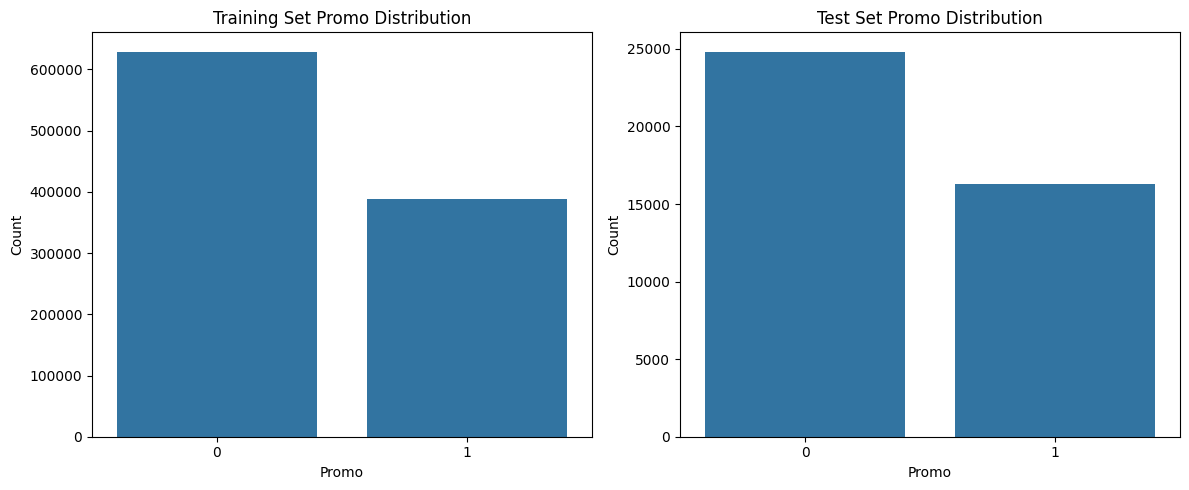

In [ ]:
# Check distribution of Promo in training and test sets
promo_train = train['Promo'].value_counts().sort_index()
promo_test = test['Promo'].value_counts().sort_index()

print("Training Set Promo Distribution:")
print(promo_train)
print("\nTest Set Promo Distribution:")
print(promo_test)

# Plot side by side bar charts
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.barplot(x=promo_train.index.astype(str), y=promo_train.values, ax=axes[0])
axes[0].set_title("Training Set Promo Distribution")
axes[0].set_xlabel("Promo")
axes[0].set_ylabel("Count")

sns.barplot(x=promo_test.index.astype(str), y=promo_test.values, ax=axes[1])
axes[1].set_title("Test Set Promo Distribution")
axes[1].set_xlabel("Promo")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


HolidayPeriod Distribution:
HolidayPeriod
Normal    851058
During    162122
Before      2519
After       1510
Name: count, dtype: int64


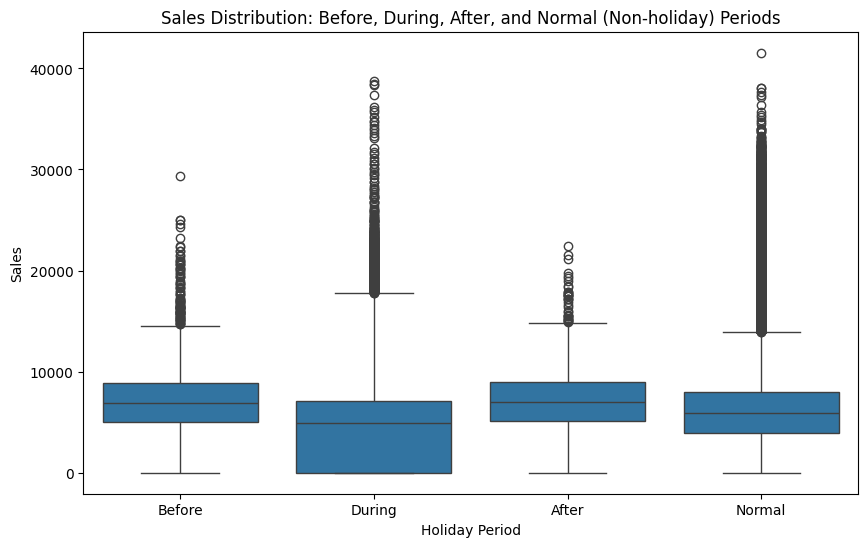


Average Sales by Holiday Period:
HolidayPeriod
After     6919.184768
Before    6970.543073
During    4684.874237
Normal    5975.682827
Name: Sales, dtype: float64


In [ ]:
# Create a new column for holiday period with default value "Normal"
train['HolidayPeriod'] = 'Normal'

# Mark days with a state holiday as "During"
train.loc[train['StateHoliday'] != '0', 'HolidayPeriod'] = 'During'

# Mark days before a holiday:
# If the next day is "During" and the current day is "Normal", label as "Before"
train['HolidayPeriod'] = train['HolidayPeriod'].mask(
    (train['HolidayPeriod'] == 'Normal') & (train['HolidayPeriod'].shift(-1) == 'During'),
    'Before'
)

# Mark days after a holiday:
# If the previous day is "During" and the current day is "Normal", label as "After"
train['HolidayPeriod'] = train['HolidayPeriod'].mask(
    (train['HolidayPeriod'] == 'Normal') & (train['HolidayPeriod'].shift(1) == 'During'),
    'After'
)

# Display the counts for each HolidayPeriod category
print("HolidayPeriod Distribution:")
print(train['HolidayPeriod'].value_counts())

# Visualize sales distribution across the holiday periods using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='HolidayPeriod', y='Sales', data=train, order=['Before', 'During', 'After', 'Normal'])
plt.title("Sales Distribution: Before, During, After, and Normal (Non-holiday) Periods")
plt.xlabel("Holiday Period")
plt.ylabel("Sales")
plt.show()

# Calculate and print the average sales for each holiday period
avg_sales = train.groupby('HolidayPeriod')['Sales'].mean()
print("\nAverage Sales by Holiday Period:")
print(avg_sales)


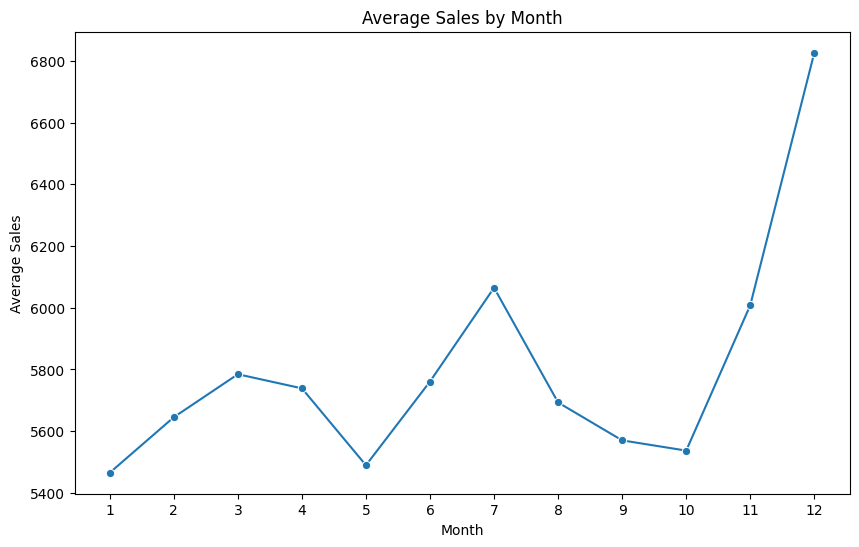

Christmas Sales Data Summary:
count     4100.000000
mean       168.733171
std       1492.274865
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      32169.000000
Name: Sales, dtype: float64


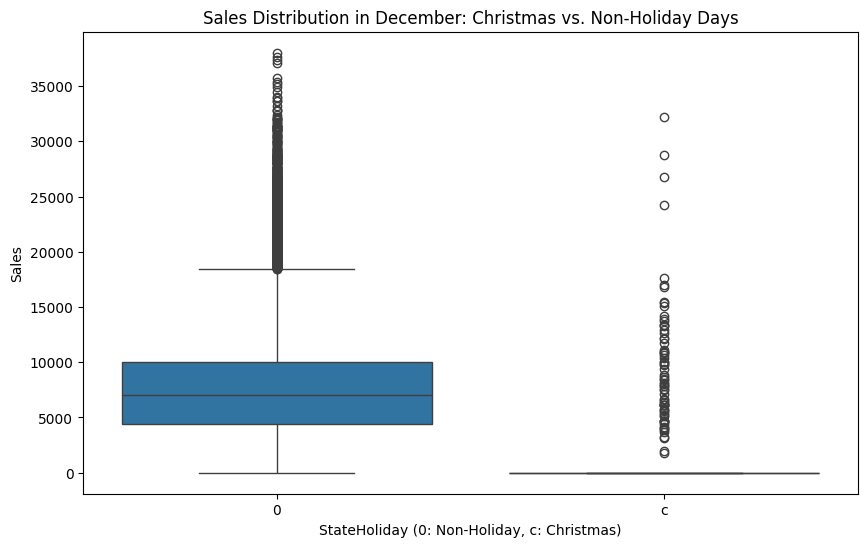


Easter Sales Data Summary:
count     6690.000000
mean       214.311510
std       1816.918138
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      38722.000000
Name: Sales, dtype: float64


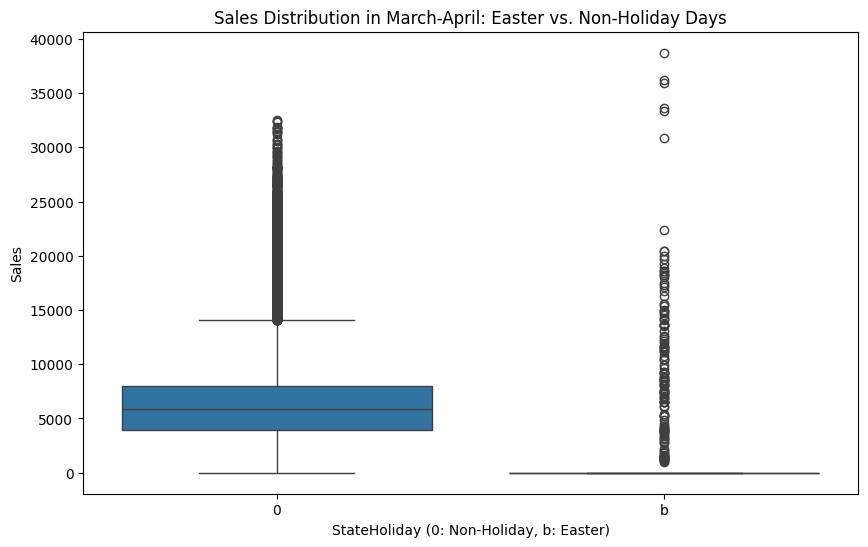

In [ ]:
# Convert 'Date' to datetime format
train['Date'] = pd.to_datetime(train['Date'], format='%Y-%m-%d', errors='coerce')

# Check if there were any conversion issues
if train['Date'].isnull().any():
    print("Warning: Some dates could not be converted and are set to NaT.")

# Sort by Date
train.sort_values('Date', inplace=True)

# --- Overall Seasonal Analysis ---
# Extract Month and Year from Date for seasonal aggregation
train['Month'] = train['Date'].dt.month
train['Year'] = train['Date'].dt.year

# Calculate average sales per month to observe seasonal patterns
monthly_sales = train.groupby('Month')['Sales'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='Month', y='Sales', data=monthly_sales, marker='o')
plt.title("Average Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(range(1,13))
plt.show()

# --- Holiday-Specific Analysis ---

# Christmas: According to the dataset, StateHoliday 'c' indicates Christmas.
christmas_sales = train[train['StateHoliday'] == 'c']
print("Christmas Sales Data Summary:")
print(christmas_sales['Sales'].describe())

# Compare sales for Christmas vs. non-holiday days in December
december_sales = train[train['Date'].dt.month == 12]
plt.figure(figsize=(10,6))
sns.boxplot(x='StateHoliday', y='Sales', data=december_sales, order=['0', 'c'])
plt.title("Sales Distribution in December: Christmas vs. Non-Holiday Days")
plt.xlabel("StateHoliday (0: Non-Holiday, c: Christmas)")
plt.ylabel("Sales")
plt.show()

# Easter: StateHoliday 'b' indicates Easter.
easter_sales = train[train['StateHoliday'] == 'b']
print("\nEaster Sales Data Summary:")
print(easter_sales['Sales'].describe())

# Compare sales for Easter vs. non-holiday days in the typical Easter period (e.g., March and April)
mar_apr_sales = train[train['Date'].dt.month.isin([3, 4])]
plt.figure(figsize=(10,6))
sns.boxplot(x='StateHoliday', y='Sales', data=mar_apr_sales, order=['0', 'b'])
plt.title("Sales Distribution in March-April: Easter vs. Non-Holiday Days")
plt.xlabel("StateHoliday (0: Non-Holiday, b: Easter)")
plt.ylabel("Sales")
plt.show()


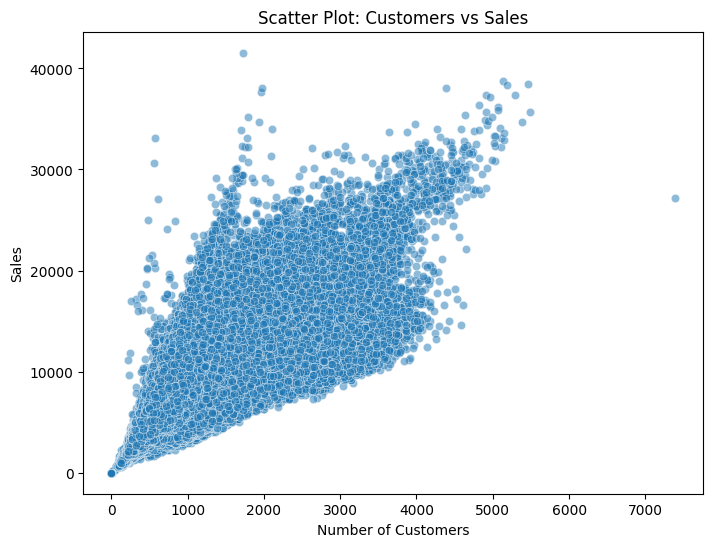

Correlation between Sales and Customers: 0.8947107733017003


In [ ]:
# Scatter plot of Customers vs Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Customers", y="Sales", data=train, alpha=0.5)
plt.title("Scatter Plot: Customers vs Sales")
plt.xlabel("Number of Customers")
plt.ylabel("Sales")
plt.show()

# Compute the Pearson correlation coefficient
correlation = train["Customers"].corr(train["Sales"])
print("Correlation between Sales and Customers:", correlation)


Average Sales on Promo Days: 7991.152045969903
Average Sales on Non-Promo Days: 4406.050805160786
Average Customers on Promo Days: 820.0988146773861
Average Customers on Non-Promo Days: 517.8235417537579
Average Sales per Customer on Promo Days: 10.178906892166273
Average Sales per Customer on Non-Promo Days: 8.941127696724879


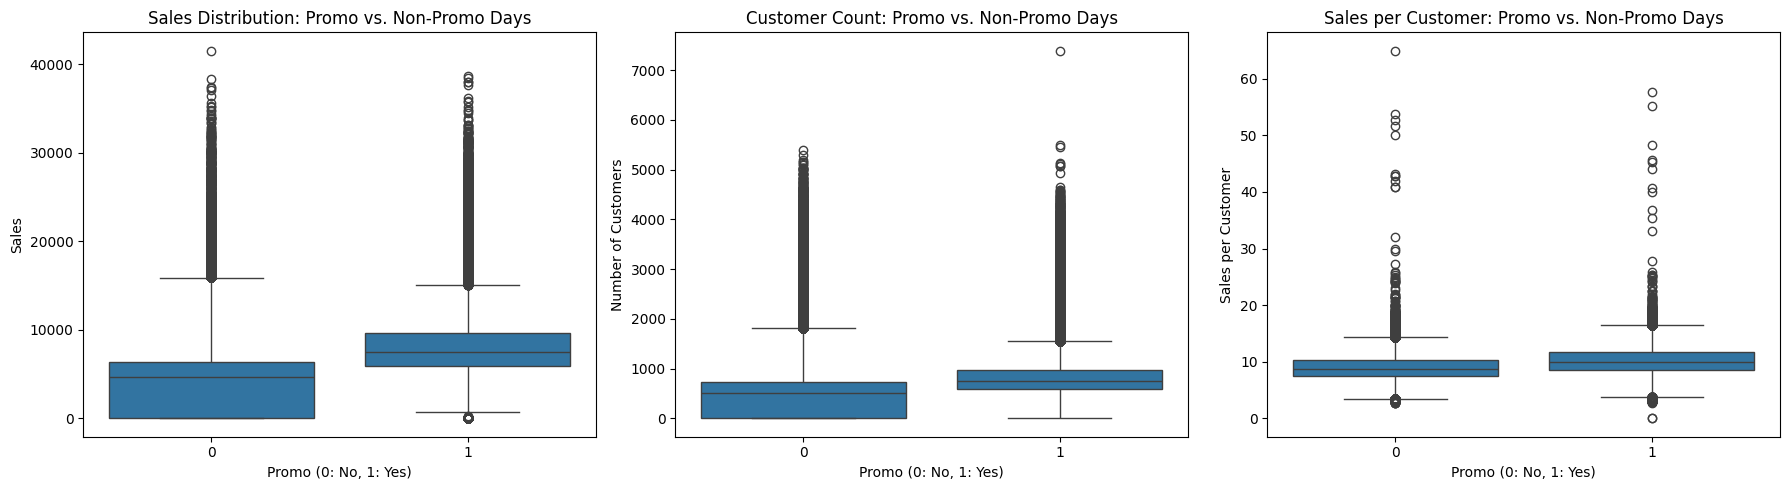

In [ ]:
# Separate data into promo and non-promo days
promo_days = train[train['Promo'] == 1]
no_promo_days = train[train['Promo'] == 0]

# Calculate average sales and customer counts
avg_sales_promo = promo_days['Sales'].mean()
avg_sales_no_promo = no_promo_days['Sales'].mean()
avg_customers_promo = promo_days['Customers'].mean()
avg_customers_no_promo = no_promo_days['Customers'].mean()

print("Average Sales on Promo Days:", avg_sales_promo)
print("Average Sales on Non-Promo Days:", avg_sales_no_promo)
print("Average Customers on Promo Days:", avg_customers_promo)
print("Average Customers on Non-Promo Days:", avg_customers_no_promo)

# Create a new column for Sales per Customer for further insight
promo_days = promo_days.copy()
no_promo_days = no_promo_days.copy()
promo_days['Sales_per_Customer'] = promo_days['Sales'] / promo_days['Customers']
no_promo_days['Sales_per_Customer'] = no_promo_days['Sales'] / no_promo_days['Customers']

avg_spc_promo = promo_days['Sales_per_Customer'].mean()
avg_spc_no_promo = no_promo_days['Sales_per_Customer'].mean()

print("Average Sales per Customer on Promo Days:", avg_spc_promo)
print("Average Sales per Customer on Non-Promo Days:", avg_spc_no_promo)

# --- Visualizations ---

plt.figure(figsize=(18, 5))

# Boxplot for Sales distribution
plt.subplot(1, 3, 1)
sns.boxplot(x='Promo', y='Sales', data=train)
plt.title("Sales Distribution: Promo vs. Non-Promo Days")
plt.xlabel("Promo (0: No, 1: Yes)")
plt.ylabel("Sales")

# Boxplot for Customers distribution
plt.subplot(1, 3, 2)
sns.boxplot(x='Promo', y='Customers', data=train)
plt.title("Customer Count: Promo vs. Non-Promo Days")
plt.xlabel("Promo (0: No, 1: Yes)")
plt.ylabel("Number of Customers")

# Combine promo flag back into original train data for Sales per Customer ratio
train['Sales_per_Customer'] = train['Sales'] / train['Customers']
plt.subplot(1, 3, 3)
sns.boxplot(x='Promo', y='Sales_per_Customer', data=train)
plt.title("Sales per Customer: Promo vs. Non-Promo Days")
plt.xlabel("Promo (0: No, 1: Yes)")
plt.ylabel("Sales per Customer")

plt.tight_layout()
plt.show()


Top 10 Stores by Sales Uplift from Promotions:
      Store  Sales_No_Promo   Sales_Promo  Promo_Effect
197     198     1292.500000   4211.216667      2.258195
606     607     1880.798969   5435.191667      1.889831
542     543     1383.443299   3817.008333      1.759064
574     575     2664.858051   7294.339161      1.737234
270     271     4009.890034  10507.675000      1.620440
692     693     3390.144330   8854.822222      1.611931
95       96     2675.621993   6891.002778      1.575477
1107   1108     2976.214777   7640.116667      1.567058
551     552     4008.190722  10272.252778      1.562815
634     635     3065.690722   7847.163889      1.559672


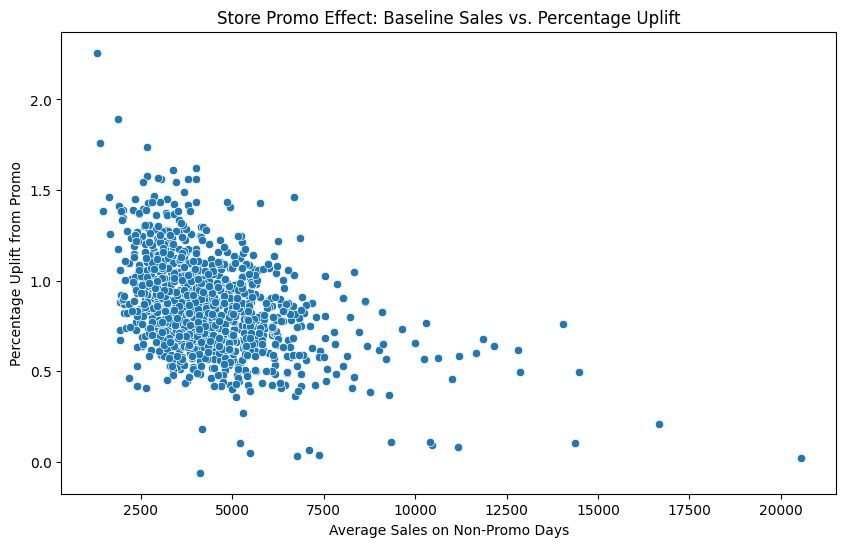

In [ ]:
# Group by Store and Promo flag, then compute average Sales for each group
store_sales = train.groupby(['Store', 'Promo']).agg({'Sales': 'mean'}).reset_index()

# Pivot the table so that we have average sales for non-promo (0) and promo (1) days side-by-side for each store
store_sales_pivot = store_sales.pivot(index='Store', columns='Promo', values='Sales')
store_sales_pivot.columns = ['Sales_No_Promo', 'Sales_Promo']
store_sales_pivot = store_sales_pivot.reset_index()

# Calculate the relative percentage uplift in sales due to promotions
store_sales_pivot['Promo_Effect'] = (store_sales_pivot['Sales_Promo'] - store_sales_pivot['Sales_No_Promo']) / store_sales_pivot['Sales_No_Promo']

# Display the top 10 stores with the highest promo effect
print("Top 10 Stores by Sales Uplift from Promotions:")
print(store_sales_pivot.sort_values(by='Promo_Effect', ascending=False).head(10))

# Visualization: Scatter plot of baseline (non-promo) sales vs. promo effect
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales_No_Promo', y='Promo_Effect', data=store_sales_pivot)
plt.title("Store Promo Effect: Baseline Sales vs. Percentage Uplift")
plt.xlabel("Average Sales on Non-Promo Days")
plt.ylabel("Percentage Uplift from Promo")
plt.show()


Average Customers on Opening Days: 831.2772674127276
Average Customers on Closing Days: 664.4317873911995
Average Customers on Regular Open Days: 772.4490386744095


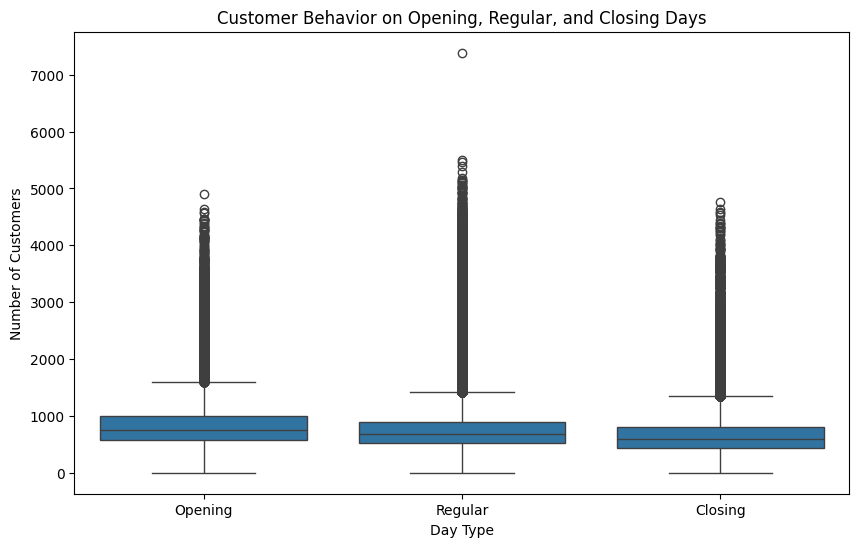

In [ ]:
# Create helper columns for previous and next day's Open status per store
train['prev_open'] = train.groupby('Store')['Open'].shift(1)
train['next_open'] = train.groupby('Store')['Open'].shift(-1)

# Define "Opening Day": current day is open (Open==1) and either the previous day was closed (0) or missing (first record)
train['is_opening_day'] = ((train['prev_open'] == 0) | (train['prev_open'].isnull())) & (train['Open'] == 1)

# Define "Closing Day": current day is open (Open==1) and either the next day is closed (0) or missing (last record)
train['is_closing_day'] = (train['Open'] == 1) & ((train['next_open'] == 0) | (train['next_open'].isnull()))

# Filter data into three categories: opening days, closing days, and regular open days
opening_days = train[train['is_opening_day']]
closing_days = train[train['is_closing_day']]
regular_open_days = train[(train['Open'] == 1) & (~train['is_opening_day']) & (~train['is_closing_day'])]

# Compute average number of customers for each category
avg_customers_opening = opening_days['Customers'].mean()
avg_customers_closing = closing_days['Customers'].mean()
avg_customers_regular = regular_open_days['Customers'].mean()

print("Average Customers on Opening Days:", avg_customers_opening)
print("Average Customers on Closing Days:", avg_customers_closing)
print("Average Customers on Regular Open Days:", avg_customers_regular)

# Combine data for visualization
opening_days = opening_days.copy(); opening_days['DayType'] = 'Opening'
closing_days = closing_days.copy(); closing_days['DayType'] = 'Closing'
regular_open_days = regular_open_days.copy(); regular_open_days['DayType'] = 'Regular'

combined = pd.concat([opening_days, closing_days, regular_open_days])

# Visualize using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayType', y='Customers', data=combined, order=['Opening', 'Regular', 'Closing'])
plt.title("Customer Behavior on Opening, Regular, and Closing Days")
plt.xlabel("Day Type")
plt.ylabel("Number of Customers")
plt.show()


Stores open on all weekdays: [85, 262, 335, 423, 494, 562, 682, 733, 769, 1097]

Average weekend sales:
AllWeekdayOpen
0     2945.493078
1    11627.113060
Name: Sales, dtype: float64


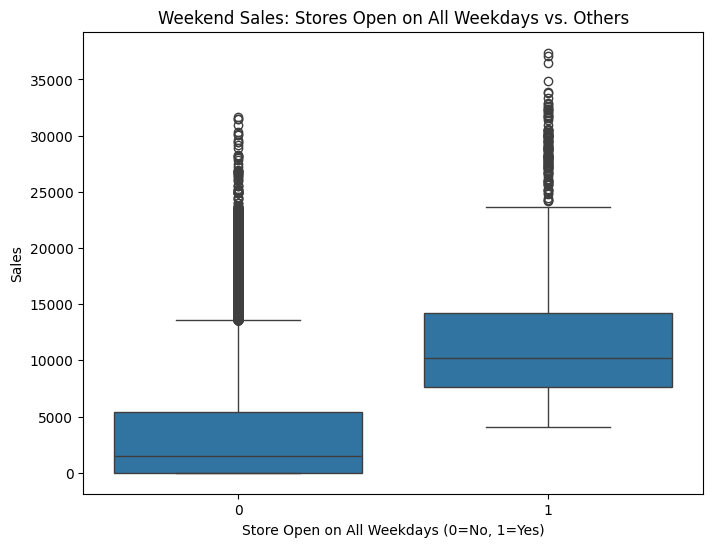

In [ ]:
# Create a new column for day-of-week (Monday=0, Sunday=6)
train['Weekday'] = train['Date'].dt.dayofweek

# Identify stores that are open on all weekdays (Monday to Friday)
# Group by store for weekdays (0-4) and check if the minimum 'Open' value is 1.
weekday_open_stores = train[train['Weekday'] < 5].groupby('Store')['Open'].min()
# Only those stores with min value 1 are open every weekday
weekday_open_stores = weekday_open_stores[weekday_open_stores == 1].index.tolist()
print("Stores open on all weekdays:", weekday_open_stores)

# Add a flag to the main dataset indicating if a store is open on all weekdays
train['AllWeekdayOpen'] = train['Store'].apply(lambda s: 1 if s in weekday_open_stores else 0)

# Filter for weekend data (Saturday and Sunday: Weekday 5 and 6)
weekend_data = train[train['Weekday'] >= 5]

# Calculate average weekend sales for stores open on all weekdays vs. others
avg_sales_weekend = weekend_data.groupby('AllWeekdayOpen')['Sales'].mean()
print("\nAverage weekend sales:")
print(avg_sales_weekend)

# Visualize the distribution of weekend sales using a boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='AllWeekdayOpen', y='Sales', data=weekend_data)
plt.title("Weekend Sales: Stores Open on All Weekdays vs. Others")
plt.xlabel("Store Open on All Weekdays (0=No, 1=Yes)")
plt.ylabel("Sales")
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17556\2407857956.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_assortment = train_merged.groupby('Assortment')['Sales'].mean().reset_index()


Average Sales by Assortment Type:
  Assortment        Sales
0          a  5481.026096
1          b  8553.931999
2          c  6058.676567


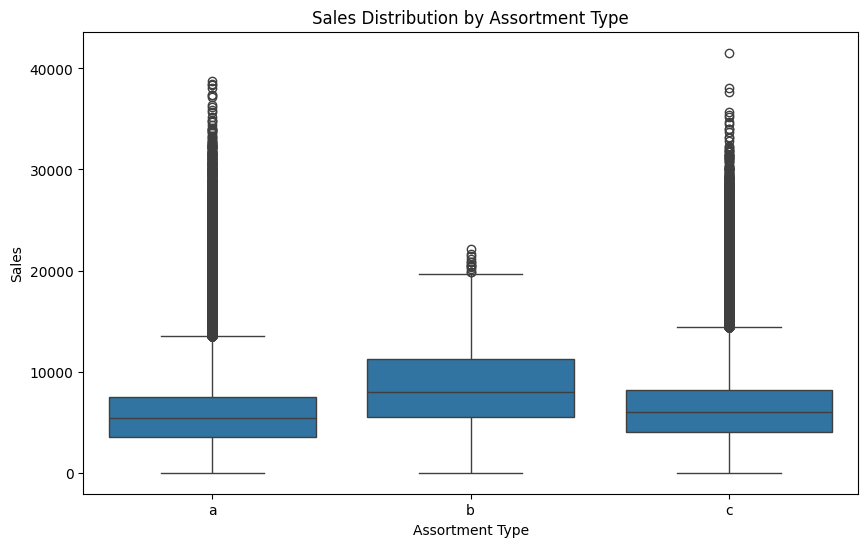

In [ ]:
# Merge the training data with the store data on 'Store'
train_merged = pd.merge(train, store[['Store', 'Assortment']], on='Store', how='left')

# Calculate average sales for each assortment type
sales_by_assortment = train_merged.groupby('Assortment')['Sales'].mean().reset_index()
print("Average Sales by Assortment Type:")
print(sales_by_assortment)

# Visualize the sales distribution by assortment type using a boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Assortment', y='Sales', data=train_merged)
plt.title("Sales Distribution by Assortment Type")
plt.xlabel("Assortment Type")
plt.ylabel("Sales")
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17556\2825940330.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_store['CompetitionDistance'].fillna(train_store['CompetitionDistance'].median(), inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17556\2825940330.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_d

Average Sales by Competition Distance:
  CompetitionDistance_Binned        Sales
0         Very Close (<500m)  6307.393560
1          Close (500-1500m)  5697.954243
2        Medium (1500-5000m)  5615.214645
3               Far (5-10km)  5567.718124
4           Very Far (>10km)  5685.546657


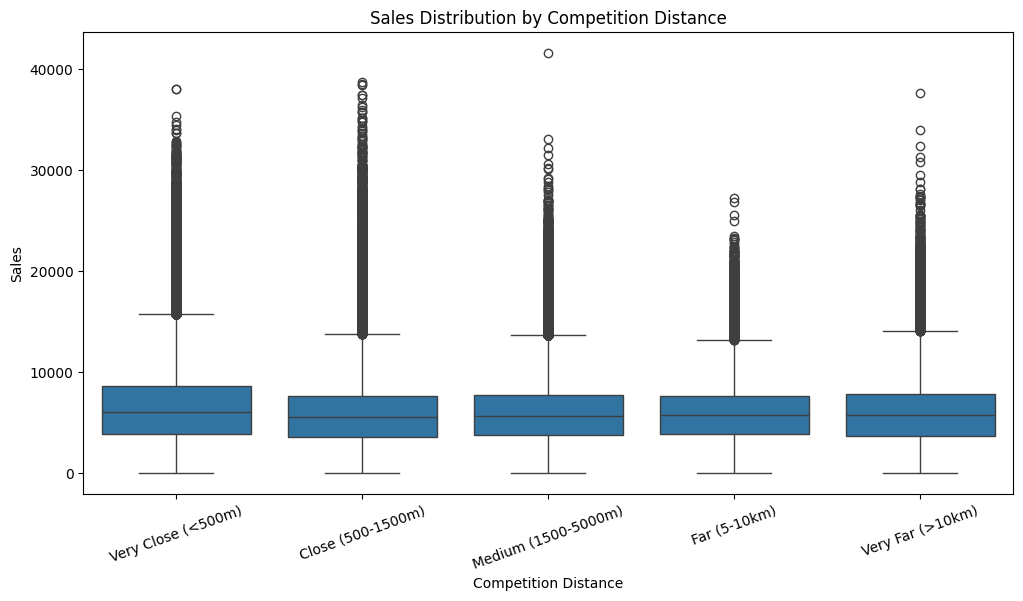

In [ ]:
# Merge datasets
train_store = pd.merge(train, store[['Store', 'CompetitionDistance']], on='Store', how='left')

# Handle missing values in CompetitionDistance (fill with median)
train_store['CompetitionDistance'].fillna(train_store['CompetitionDistance'].median(), inplace=True)

# Create bins for competition distance
bins = [0, 500, 1500, 5000, 10000, train_store['CompetitionDistance'].max()]
labels = ['Very Close (<500m)', 'Close (500-1500m)', 'Medium (1500-5000m)', 'Far (5-10km)', 'Very Far (>10km)']
train_store['CompetitionDistance_Binned'] = pd.cut(train_store['CompetitionDistance'], bins=bins, labels=labels)

# Calculate average sales for each distance category
sales_by_distance = train_store.groupby('CompetitionDistance_Binned')['Sales'].mean().reset_index()
print("Average Sales by Competition Distance:")
print(sales_by_distance)

# Visualize Sales Distribution by Competition Distance
plt.figure(figsize=(12,6))
sns.boxplot(x='CompetitionDistance_Binned', y='Sales', data=train_store, order=labels)
plt.title("Sales Distribution by Competition Distance")
plt.xlabel("Competition Distance")
plt.ylabel("Sales")
plt.xticks(rotation=20)
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17556\806739238.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_store['CompetitionOpenSinceYear'].fillna(0, inplace=True)  # 0 represents no competitor before
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17556\806739238.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

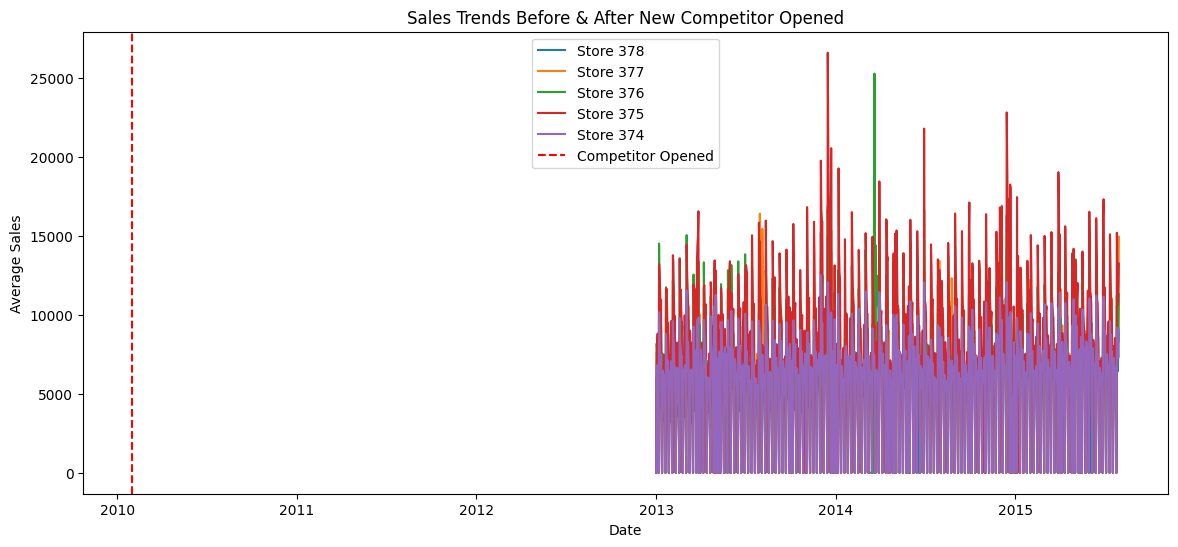

In [ ]:
# Merge datasets
train_store = pd.merge(train, store[['Store', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']], on='Store', how='left')

# Handle missing values in CompetitionOpenSince
train_store['CompetitionOpenSinceYear'].fillna(0, inplace=True)  # 0 represents no competitor before
train_store['CompetitionOpenSinceMonth'].fillna(0, inplace=True)

# Create a date column for competition opening
train_store['CompetitionOpenDate'] = pd.to_datetime(train_store['CompetitionOpenSinceYear'].astype(int).astype(str) + '-' + 
                                                   train_store['CompetitionOpenSinceMonth'].astype(int).astype(str) + '-01', 
                                                   errors='coerce')

# Identify stores that previously had no competition but later gained a competitor
new_competitors = train_store[(train_store['CompetitionDistance'].notna()) & (train_store['CompetitionOpenDate'].notna())]

# Sales before and after competition opened
sales_trend = new_competitors.groupby(['Store', 'Date'])['Sales'].mean().reset_index()

# Plot Sales Before & After Competition
plt.figure(figsize=(14,6))
for store in new_competitors['Store'].unique()[:5]:  # Plot for first 5 stores as example
    store_data = new_competitors[new_competitors['Store'] == store]
    plt.plot(store_data['Date'], store_data['Sales'], label=f'Store {store}')

plt.axvline(x=new_competitors['CompetitionOpenDate'].median(), color='red', linestyle='--', label='Competitor Opened')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Average Sales")
plt.title("Sales Trends Before & After New Competitor Opened")
plt.show()


In [ ]:
print(type(train))
print(type(store))


<class 'pandas.core.frame.DataFrame'>
<class 'numpy.int32'>


In [ ]:
import pandas as pd

# Reload the correct store data
store = pd.read_csv("store.csv")

# Check if it's a DataFrame now
print(type(store))  # Should print <class 'pandas.core.frame.DataFrame'>

# Proceed with merging
train_store = pd.merge(train, store, on='Store', how='left')
test_store = pd.merge(test, store, on='Store', how='left')


<class 'pandas.core.frame.DataFrame'>


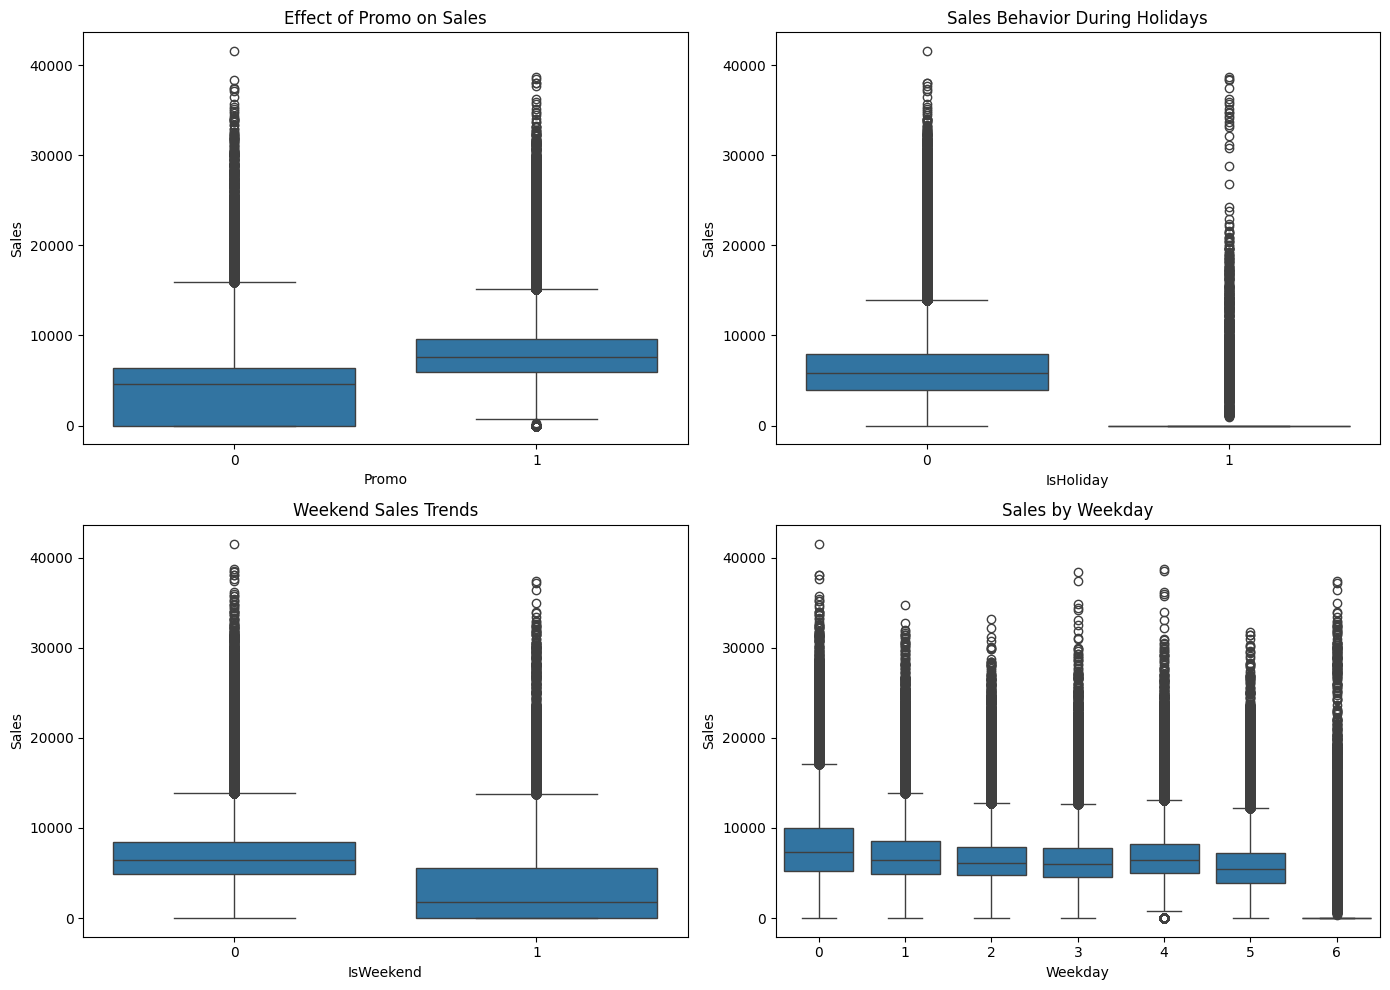

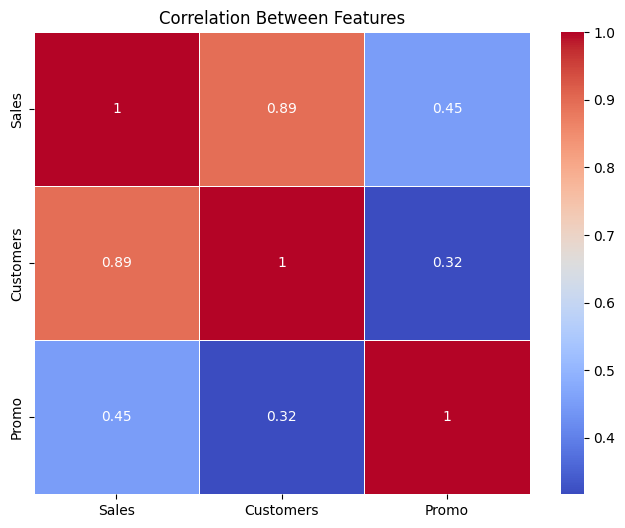

In [ ]:
# Feature Engineering
train_store['Year'] = train_store['Date'].dt.year
train_store['Month'] = train_store['Date'].dt.month
train_store['WeekOfYear'] = train_store['Date'].dt.isocalendar().week.astype(int)
train_store['DayOfWeek'] = train_store['Date'].dt.dayofweek
train_store['IsWeekend'] = train_store['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
train_store['IsHoliday'] = train_store['StateHoliday'].apply(lambda x: 1 if x in ['a', 'b', 'c'] else 0)

# Exploratory Data Analysis
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
sns.boxplot(x='Promo', y='Sales', data=train_store, ax=ax[0,0])
sns.boxplot(x='IsHoliday', y='Sales', data=train_store, ax=ax[0,1])
sns.boxplot(x='IsWeekend', y='Sales', data=train_store, ax=ax[1,0])
sns.boxplot(x='Weekday', y='Sales', data=train_store, ax=ax[1,1])
ax[0,0].set_title("Effect of Promo on Sales")
ax[0,1].set_title("Sales Behavior During Holidays")
ax[1,0].set_title("Weekend Sales Trends")
ax[1,1].set_title("Sales by Weekday")
plt.tight_layout()
plt.show()

# Correlation Analysis
correlation = train_store[['Sales', 'Customers', 'Promo',]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Features")
plt.show()

# Save cleaned data
train_store.to_csv("store.csv", index=False)


In [ ]:
# Convert date column to datetime format if not already
if 'Date' in merged_data.columns:
    merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Label Encoding for ordinal categorical features
store_type_mapping = {'a': 1, 'b': 2, 'c': 3, 'd': 4}
assortment_mapping = {'a': 1, 'b': 2, 'c': 3}
merged_data['StoreType'] = merged_data['StoreType'].map(store_type_mapping)
merged_data['Assortment'] = merged_data['Assortment'].map(assortment_mapping)

# One-Hot Encoding for non-ordinal categorical features
merged_data = pd.get_dummies(merged_data, columns=['StateHoliday'], drop_first=True)

# Handle missing values for categorical columns if any exist
merged_data.fillna(0, inplace=True)  # Filling NA values with 0 as a simple approach

# Save the processed dataset
processed_file_path = "processed_data.csv"
merged_data.to_csv(processed_file_path, index=False)

# Return the first few rows after encoding
merged_data.head()


,Id,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StateHoliday_a
0,1,1,4,2015-09-17,1.0,1,0,3,1,1270.0,9.0,2008.0,0,0.0,0.0,None,False
1,2,3,4,2015-09-17,1.0,1,0,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",False
2,3,7,4,2015-09-17,1.0,1,0,1,3,24000.0,4.0,2013.0,0,0.0,0.0,None,False
3,4,8,4,2015-09-17,1.0,1,0,1,1,7520.0,10.0,2014.0,0,0.0,0.0,None,False
4,5,9,4,2015-09-17,1.0,1,0,1,3,2030.0,8.0,2000.0,0,0.0,0.0,None,False


In [ ]:
# Check for missing values
missing_values = train_store.isnull().sum()
print(missing_values[missing_values > 0])  # Show only columns with missing values


Sales_per_Customer           172869
prev_open                      1115
next_open                      1115
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


In [ ]:
# Fill missing competitor distances with a large value (assuming no close competitor)
train_store["CompetitionDistance"].fillna(train_store["CompetitionDistance"].max(), inplace=True)

# Fill missing competitor open months/years with reasonable defaults
train_store["CompetitionOpenSinceMonth"].fillna(1, inplace=True)  # Assume January
train_store["CompetitionOpenSinceYear"].fillna(train_store["Date"].dt.year.min(), inplace=True)

# Fill missing promo2 data
train_store["Promo2SinceWeek"].fillna(0, inplace=True)
train_store["Promo2SinceYear"].fillna(0, inplace=True)
train_store["PromoInterval"].fillna("None", inplace=True)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17556\257381799.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_store["CompetitionDistance"].fillna(train_store["CompetitionDistance"].max(), inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17556\257381799.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

In [ ]:
# Convert Assortment and StoreType to numerical
assortment_map = {"a": 1, "b": 2, "c": 3}
store_type_map = {"a": 1, "b": 2, "c": 3, "d": 4}

train_store["Assortment"] = train_store["Assortment"].map(assortment_map)
train_store["StoreType"] = train_store["StoreType"].map(store_type_map)

train_store


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,HolidayPeriod,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,WeekOfYear,IsWeekend,IsHoliday
0,1115,1,2013-01-01,0,0,0,0,a,1,During,...,5350.0,1.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,0,1
1,379,1,2013-01-01,0,0,0,0,a,1,During,...,6630.0,1.0,2013.0,0,0.0,0.0,None,1,0,1
2,378,1,2013-01-01,0,0,0,0,a,1,During,...,2140.0,8.0,2012.0,0,0.0,0.0,None,1,0,1
3,377,1,2013-01-01,0,0,0,0,a,1,During,...,100.0,6.0,2010.0,1,18.0,2010.0,"Feb,May,Aug,Nov",1,0,1
4,376,1,2013-01-01,0,0,0,0,a,1,During,...,160.0,8.0,2012.0,0,0.0,0.0,None,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,746,4,2015-07-31,9082,638,1,1,0,1,Normal,...,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",31,0,0
1017205,747,4,2015-07-31,10708,826,1,1,0,1,Normal,...,45740.0,8.0,2008.0,0,0.0,0.0,None,31,0,0
1017206,748,4,2015-07-31,7481,578,1,1,0,1,Normal,...,2380.0,3.0,2010.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,0,0
1017207,742,4,2015-07-31,10460,1016,1,1,0,1,Normal,...,4380.0,1.0,2013.0,0,0.0,0.0,None,31,0,0


In [ ]:
train_store["IsPromo"] = train_store["Promo"].astype(int)
train_store["IsHoliday"] = train_store["StateHoliday"].apply(lambda x: 1 if x in ["a", "b", "c"] else 0)

# Interaction between promos and holidays
train_store["PromoOnHoliday"] = train_store["IsPromo"] * train_store["IsHoliday"]
train_store["PromoOnWeekend"] = train_store["IsPromo"] * train_store["IsWeekend"]

train_store


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,HolidayPeriod,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,WeekOfYear,IsWeekend,IsHoliday,IsPromo,PromoOnHoliday,PromoOnWeekend
0,1115,1,2013-01-01,0,0,0,0,a,1,During,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,0,1,0,0,0
1,379,1,2013-01-01,0,0,0,0,a,1,During,...,0,0.0,0.0,None,1,0,1,0,0,0
2,378,1,2013-01-01,0,0,0,0,a,1,During,...,0,0.0,0.0,None,1,0,1,0,0,0
3,377,1,2013-01-01,0,0,0,0,a,1,During,...,1,18.0,2010.0,"Feb,May,Aug,Nov",1,0,1,0,0,0
4,376,1,2013-01-01,0,0,0,0,a,1,During,...,0,0.0,0.0,None,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,746,4,2015-07-31,9082,638,1,1,0,1,Normal,...,1,35.0,2011.0,"Mar,Jun,Sept,Dec",31,0,0,1,0,0
1017205,747,4,2015-07-31,10708,826,1,1,0,1,Normal,...,0,0.0,0.0,None,31,0,0,1,0,0
1017206,748,4,2015-07-31,7481,578,1,1,0,1,Normal,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,0,0,1,0,0
1017207,742,4,2015-07-31,10460,1016,1,1,0,1,Normal,...,0,0.0,0.0,None,31,0,0,1,0,0


In [ ]:
# How long the competitor has been open
train_store["CompetitionOpenMonths"] = (
    (train_store["Year"] - train_store["CompetitionOpenSinceYear"]) * 12
    + (train_store["Month"] - train_store["CompetitionOpenSinceMonth"])
)
train_store["CompetitionOpenMonths"] = train_store["CompetitionOpenMonths"].apply(lambda x: x if x > 0 else 0)

train_store

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,HolidayPeriod,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,WeekOfYear,IsWeekend,IsHoliday,IsPromo,PromoOnHoliday,PromoOnWeekend,CompetitionOpenMonths
0,1115,1,2013-01-01,0,0,0,0,a,1,During,...,22.0,2012.0,"Mar,Jun,Sept,Dec",1,0,1,0,0,0,0.0
1,379,1,2013-01-01,0,0,0,0,a,1,During,...,0.0,0.0,None,1,0,1,0,0,0,0.0
2,378,1,2013-01-01,0,0,0,0,a,1,During,...,0.0,0.0,None,1,0,1,0,0,0,5.0
3,377,1,2013-01-01,0,0,0,0,a,1,During,...,18.0,2010.0,"Feb,May,Aug,Nov",1,0,1,0,0,0,31.0
4,376,1,2013-01-01,0,0,0,0,a,1,During,...,0.0,0.0,None,1,0,1,0,0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,746,4,2015-07-31,9082,638,1,1,0,1,Normal,...,35.0,2011.0,"Mar,Jun,Sept,Dec",31,0,0,1,0,0,53.0
1017205,747,4,2015-07-31,10708,826,1,1,0,1,Normal,...,0.0,0.0,None,31,0,0,1,0,0,83.0
1017206,748,4,2015-07-31,7481,578,1,1,0,1,Normal,...,14.0,2011.0,"Jan,Apr,Jul,Oct",31,0,0,1,0,0,64.0
1017207,742,4,2015-07-31,10460,1016,1,1,0,1,Normal,...,0.0,0.0,None,31,0,0,1,0,0,30.0


In [ ]:
train_store.to_csv("cleaned_train_store.csv", index=False)
print("Data preprocessing and feature engineering completed successfully.")




Data preprocessing and feature engineering completed successfully.


In [ ]:
train_store.to_csv

<bound method NDFrame.to_csv of          Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0         1115          1 2013-01-01      0          0     0      0   
1          379          1 2013-01-01      0          0     0      0   
2          378          1 2013-01-01      0          0     0      0   
3          377          1 2013-01-01      0          0     0      0   
4          376          1 2013-01-01      0          0     0      0   
...        ...        ...        ...    ...        ...   ...    ...   
1017204    746          4 2015-07-31   9082        638     1      1   
1017205    747          4 2015-07-31  10708        826     1      1   
1017206    748          4 2015-07-31   7481        578     1      1   
1017207    742          4 2015-07-31  10460       1016     1      1   
1017208      1          4 2015-07-31   5263        555     1      1   

        StateHoliday  SchoolHoliday HolidayPeriod  ...  Promo2SinceWeek  \
0                  a              1     

In [ ]:
# Extract Day, Month, Year, Week
train_store["Year"] = train_store["Date"].dt.year
train_store["Month"] = train_store["Date"].dt.month
train_store["WeekOfYear"] = train_store["Date"].dt.isocalendar().week
train_store["DayOfWeek"] = train_store["Date"].dt.dayofweek
train_store["IsWeekend"] = (train_store["DayOfWeek"] >= 5).astype(int)

train_store

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,HolidayPeriod,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,WeekOfYear,IsWeekend,IsHoliday,IsPromo,PromoOnHoliday,PromoOnWeekend,CompetitionOpenMonths
0,1115,1,2013-01-01,0,0,0,0,a,1,During,...,22.0,2012.0,"Mar,Jun,Sept,Dec",1,0,1,0,0,0,0.0
1,379,1,2013-01-01,0,0,0,0,a,1,During,...,0.0,0.0,None,1,0,1,0,0,0,0.0
2,378,1,2013-01-01,0,0,0,0,a,1,During,...,0.0,0.0,None,1,0,1,0,0,0,5.0
3,377,1,2013-01-01,0,0,0,0,a,1,During,...,18.0,2010.0,"Feb,May,Aug,Nov",1,0,1,0,0,0,31.0
4,376,1,2013-01-01,0,0,0,0,a,1,During,...,0.0,0.0,None,1,0,1,0,0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,746,4,2015-07-31,9082,638,1,1,0,1,Normal,...,35.0,2011.0,"Mar,Jun,Sept,Dec",31,0,0,1,0,0,53.0
1017205,747,4,2015-07-31,10708,826,1,1,0,1,Normal,...,0.0,0.0,None,31,0,0,1,0,0,83.0
1017206,748,4,2015-07-31,7481,578,1,1,0,1,Normal,...,14.0,2011.0,"Jan,Apr,Jul,Oct",31,0,0,1,0,0,64.0
1017207,742,4,2015-07-31,10460,1016,1,1,0,1,Normal,...,0.0,0.0,None,31,0,0,1,0,0,30.0


In [ ]:
# Sort dataset by Date for efficiency
train_store = train_store.sort_values("Date")

# Identify holiday dates
holiday_dates = train_store[train_store["StateHoliday"].isin(["a", "b", "c"])]["Date"].unique()

# Compute Days to Next Holiday & Days After Last Holiday
train_store["DaysToHoliday"] = train_store["Date"].apply(lambda x: min((holiday_dates - x).days[(holiday_dates - x).days > 0], default=0))
train_store["DaysAfterHoliday"] = train_store["Date"].apply(lambda x: min((x - holiday_dates).days[(x - holiday_dates).days > 0], default=0))

holiday_dates

<DatetimeArray>
['2013-01-01 00:00:00', '2013-01-06 00:00:00', '2013-03-29 00:00:00',
 '2013-04-01 00:00:00', '2013-05-01 00:00:00', '2013-05-09 00:00:00',
 '2013-05-20 00:00:00', '2013-05-30 00:00:00', '2013-08-15 00:00:00',
 '2013-10-03 00:00:00', '2013-10-31 00:00:00', '2013-11-01 00:00:00',
 '2013-11-20 00:00:00', '2013-12-25 00:00:00', '2013-12-26 00:00:00',
 '2014-01-01 00:00:00', '2014-01-06 00:00:00', '2014-04-18 00:00:00',
 '2014-04-21 00:00:00', '2014-05-01 00:00:00', '2014-05-29 00:00:00',
 '2014-06-09 00:00:00', '2014-06-19 00:00:00', '2014-10-03 00:00:00',
 '2014-10-31 00:00:00', '2014-11-01 00:00:00', '2014-11-19 00:00:00',
 '2014-12-25 00:00:00', '2014-12-26 00:00:00', '2015-01-01 00:00:00',
 '2015-01-06 00:00:00', '2015-04-03 00:00:00', '2015-04-06 00:00:00',
 '2015-05-01 00:00:00', '2015-05-14 00:00:00', '2015-05-25 00:00:00',
 '2015-06-04 00:00:00']
Length: 37, dtype: datetime64[ns]

In [ ]:
train_store["IsBeginningOfMonth"] = (train_store["Date"].dt.day <= 5).astype(int)
train_store["IsMidMonth"] = ((train_store["Date"].dt.day > 10) & (train_store["Date"].dt.day < 20)).astype(int)
train_store["IsEndOfMonth"] = (train_store["Date"].dt.day >= 25).astype(int)


In [ ]:
train_store["Quarter"] = train_store["Date"].dt.quarter
train_store["IsQuarterStart"] = train_store["Date"].dt.is_quarter_start.astype(int)
train_store["IsQuarterEnd"] = train_store["Date"].dt.is_quarter_end.astype(int)


In [ ]:
# Select numerical features to scale
numerical_features = [
    "CompetitionDistance", "Year", "Month", "WeekOfYear", "DayOfWeek", 
    "DaysToHoliday", "DaysAfterHoliday", "Quarter"
]

# Initialize scaler
scaler = StandardScaler()

# Apply scaling
train_store[numerical_features] = scaler.fit_transform(train_store[numerical_features])

# Save the processed data
train_store.to_csv("final_train_store.csv", index=False)
print("Feature engineering & scaling completed successfully! 🚀")


Feature engineering & scaling completed successfully! 🚀


In [ ]:
train_store.to_csv

<bound method NDFrame.to_csv of          Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0         1115  -1.000476 2013-01-01      0          0     0      0   
1          379  -1.000476 2013-01-01      0          0     0      0   
2          378  -1.000476 2013-01-01      0          0     0      0   
3          377  -1.000476 2013-01-01      0          0     0      0   
4          376  -1.000476 2013-01-01      0          0     0      0   
...        ...        ...        ...    ...        ...   ...    ...   
1017203    745   0.501484 2015-07-31   8363        746     1      1   
1017204    746   0.501484 2015-07-31   9082        638     1      1   
1017205    747   0.501484 2015-07-31  10708        826     1      1   
1017200    741   0.501484 2015-07-31  11253       1137     1      1   
1017208      1   0.501484 2015-07-31   5263        555     1      1   

        StateHoliday  SchoolHoliday HolidayPeriod  ...  PromoOnWeekend  \
0                  a              1      

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load processed data
data = pd.read_csv("final_train_store.csv")

# Define features & target
X = data.drop(columns=["Sales", "Date"])  # Drop sales & date (not needed for training)
y = data["Sales"]

# Split dataset into training & validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Loaded & Split ✅")


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17556\2396282159.py:10: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("final_train_store.csv")


Data Loaded & Split ✅


In [ ]:
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,HolidayPeriod,...,PromoOnWeekend,CompetitionOpenMonths,DaysToHoliday,DaysAfterHoliday,IsBeginningOfMonth,IsMidMonth,IsEndOfMonth,Quarter,IsQuarterStart,IsQuarterEnd
0,1115,-1.000476,2013-01-01,0,0,0,0,a,1,During,...,0,0.0,-0.859408,-1.139770,1,0,0,-1.196333,1,0
1,379,-1.000476,2013-01-01,0,0,0,0,a,1,During,...,0,0.0,-0.859408,-1.139770,1,0,0,-1.196333,1,0
2,378,-1.000476,2013-01-01,0,0,0,0,a,1,During,...,0,5.0,-0.859408,-1.139770,1,0,0,-1.196333,1,0
3,377,-1.000476,2013-01-01,0,0,0,0,a,1,During,...,0,31.0,-0.859408,-1.139770,1,0,0,-1.196333,1,0
4,376,-1.000476,2013-01-01,0,0,0,0,a,1,During,...,0,5.0,-0.859408,-1.139770,1,0,0,-1.196333,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,745,0.501484,2015-07-31,8363,746,1,1,0,1,Normal,...,0,20.0,-1.044189,1.035498,0,0,1,0.652353,0,0
1017205,746,0.501484,2015-07-31,9082,638,1,1,0,1,Normal,...,0,53.0,-1.044189,1.035498,0,0,1,0.652353,0,0
1017206,747,0.501484,2015-07-31,10708,826,1,1,0,1,Normal,...,0,83.0,-1.044189,1.035498,0,0,1,0.652353,0,0
1017207,741,0.501484,2015-07-31,11253,1137,1,1,0,1,Normal,...,0,30.0,-1.044189,1.035498,0,0,1,0.652353,0,0


In [ ]:
print(X_train.dtypes)


Store                          int64
DayOfWeek                    float64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
HolidayPeriod                 object
Month                        float64
Year                         float64
Sales_per_Customer           float64
prev_open                    float64
next_open                    float64
is_opening_day                  bool
is_closing_day                  bool
Weekday                        int64
AllWeekdayOpen                 int64
StoreType                    float64
Assortment                   float64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
WeekOfYear                   float64
I

In [ ]:
# Define features and target
features = ["Store", "DayOfWeek", "Promo", "StateHoliday", "SchoolHoliday", "StoreType", "Assortment"]  # Adjust as needed
target = "Sales"

In [ ]:
# Split data into X (features) and y (target)
X_train = train_store[features]
y_train = train_store[target]

X_test = test_store[features] 

In [ ]:
# Identify categorical and numerical features
categorical_features = ["StateHoliday", "StoreType", "Assortment"]  # Adjust based on actual categorical columns
numerical_features = [col for col in X_train.columns if col not in categorical_features]  



In [ ]:
# Convert categorical variables to string (fix for mixed types)
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17556\2103912916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].astype(str)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17556\2103912916.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_test[col].astype(str)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17556\2103912916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [ ]:
# Define preprocessing steps
preprocessor = ColumnTransformer([
    ("num_scaler", StandardScaler(), numerical_features),  
    ("cat_encoder", OneHotEncoder(handle_unknown="ignore"), categorical_features)  
])

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

# Train pipeline
pipeline.fit(X_train, y_train)

print("✅ Pipeline Training Complete!")

✅ Pipeline Training Complete!


In [ ]:
print(X_train.dtypes)


Store              int32
DayOfWeek        float64
Promo              int32
StateHoliday      object
SchoolHoliday      int32
StoreType         object
Assortment        object
dtype: object


In [ ]:
X_train.fillna("Unknown", inplace=True)
X_val.fillna("Unknown", inplace=True)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17556\4013649241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna("Unknown", inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17556\4013649241.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  X_val.fillna("Unknown", inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['StateHoliday', 'StoreType', 'Assortment']

for col in categorical_cols:
    encoder = LabelEncoder()
    
    # Fit on training data only
    X_train[col] = encoder.fit_transform(X_train[col])

    # Create a mapping dictionary
    mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

    # Apply encoding with unknown handling
    X_val[col] = X_val[col].map(mapping).fillna(-1).astype(int)  # Use -1 for unseen values


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17556\3100291291.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = encoder.fit_transform(X_train[col])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17556\3100291291.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = encoder.fit_transform(X_train[col])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17556\3100291291.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [ ]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)

print("✅ Model Training & Prediction Successful!")


✅ Model Training & Prediction Successful!


In [ ]:
# Convert categorical columns to string type to ensure uniform encoding
categorical_cols = ["StoreType", "Assortment", "StateHoliday"]
for col in categorical_cols:
    train_store[col] = train_store[col].astype(str)  # Convert to string

# Apply Label Encoding
label_encoders = {}  
for col in categorical_cols:
    le = LabelEncoder()
    train_store[col] = le.fit_transform(train_store[col])
    label_encoders[col] = le  # Save encoders for later use


In [ ]:
print(model)


RandomForestRegressor(random_state=42)


In [ ]:
# Ensure 'Date' column is in datetime format
train_store["Date"] = pd.to_datetime(train_store["Date"], errors="coerce")

# Extract date-based features
train_store["Year"] = train_store["Date"].dt.year
train_store["Month"] = train_store["Date"].dt.month
train_store["WeekOfYear"] = train_store["Date"].dt.isocalendar().week.astype(int)
train_store["DayOfWeek"] = train_store["Date"].dt.dayofweek
train_store["IsWeekend"] = train_store["DayOfWeek"].apply(lambda x: 1 if x >= 5 else 0)
train_store["Day"] = train_store["Date"].dt.day

# Drop original 'Date' column to avoid errors
train_store = train_store.drop(columns=["Date"])


In [ ]:
print(train_store.head())  # Check if date is removed
print(train_store.isnull().sum())  # Check for NaN values


   Store  DayOfWeek  Sales  Customers  Open  Promo  StateHoliday  \
0   1115          1      0          0     0      0             1   
1    379          1      0          0     0      0             1   
2    378          1      0          0     0      0             1   
3    377          1      0          0     0      0             1   
4    376          1      0          0     0      0             1   

   SchoolHoliday HolidayPeriod  Month  ...  CompetitionOpenMonths  \
0              1        During      1  ...                    0.0   
1              1        During      1  ...                    0.0   
2              1        During      1  ...                    5.0   
3              1        During      1  ...                   31.0   
4              1        During      1  ...                    5.0   

   DaysToHoliday  DaysAfterHoliday  IsBeginningOfMonth  IsMidMonth  \
0      -0.859408          -1.13977                   1           0   
1      -0.859408          -1.13977  

In [ ]:
train_store.fillna(0, inplace=True)


In [ ]:
# Label Encoding for categorical object columns
label_enc = LabelEncoder()
train_store["HolidayPeriod"] = label_enc.fit_transform(train_store["HolidayPeriod"].astype(str))
train_store["PromoInterval"] = label_enc.fit_transform(train_store["PromoInterval"].astype(str))


In [ ]:
print(train_store.dtypes)

Store                          int32
DayOfWeek                      int32
Sales                          int32
Customers                      int32
Open                           int32
Promo                          int32
StateHoliday                   int64
SchoolHoliday                  int32
HolidayPeriod                  int64
Month                          int32
Year                           int32
Sales_per_Customer           float64
prev_open                    float64
next_open                    float64
is_opening_day                  bool
is_closing_day                  bool
Weekday                        int32
AllWeekdayOpen                 int64
StoreType                      int64
Assortment                     int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                  int64
W

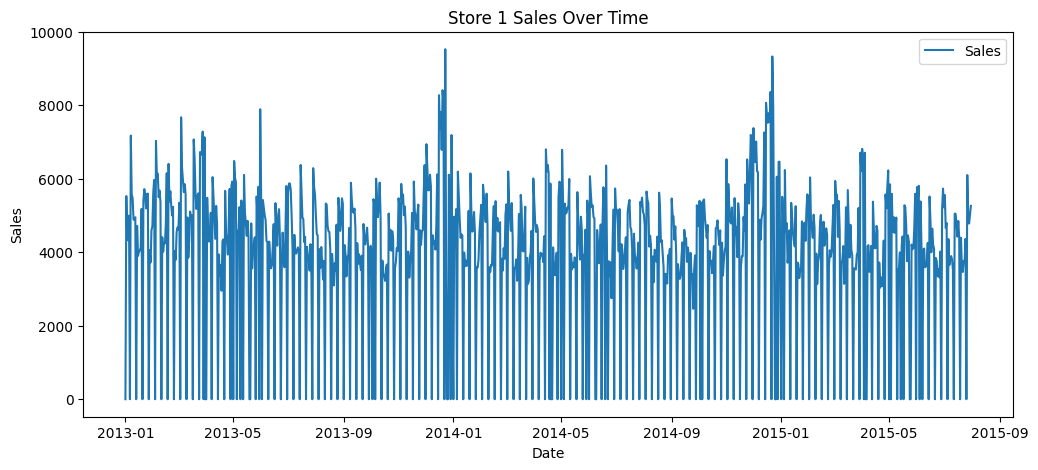

Original Sales Data ADF Test:
ADF Statistic: -4.368104368168501
p-value: 0.0003378834614142412
Critical Values:
	1%: -3.4374778690219956
	5%: -2.864686684217556
	10%: -2.5684454926748583
Data is stationary

Differenced Sales Data ADF Test:
ADF Statistic: -11.4941793848935
p-value: 4.657503151741617e-21
Critical Values:
	1%: -3.4374778690219956
	5%: -2.864686684217556
	10%: -2.5684454926748583
Data is stationary


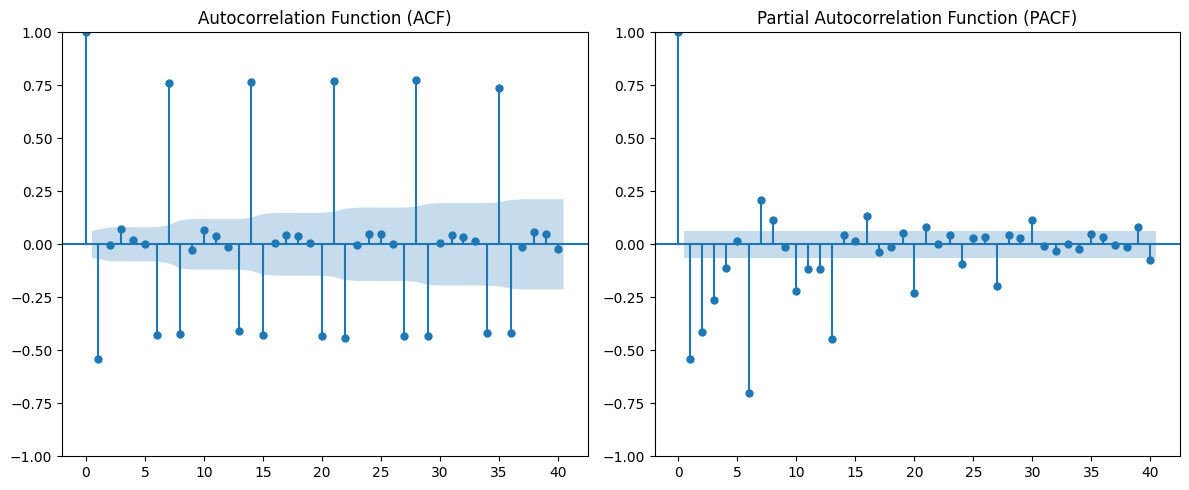

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load data
train = pd.read_csv('train.csv', parse_dates=['Date'], low_memory=False)

# Isolate time series data for a single store (example: Store 1)
store_sales = train[train['Store'] == 1][['Date', 'Sales']].sort_values(by='Date')
store_sales.set_index('Date', inplace=True)

# Plot sales data
plt.figure(figsize=(12, 5))
plt.plot(store_sales, label="Sales")
plt.title("Store 1 Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Check stationarity using Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")
    if result[1] < 0.05:
        print("Data is stationary")
    else:
        print("Data is NOT stationary")

print("Original Sales Data ADF Test:")
adf_test(store_sales['Sales'])

# Apply first-order differencing if not stationary
store_sales['Sales_diff'] = store_sales['Sales'].diff()

# Check stationarity after differencing
print("\nDifferenced Sales Data ADF Test:")
adf_test(store_sales['Sales_diff'].dropna())

# Plot ACF and PACF
plt.figure(figsize=(12,5))
plt.subplot(121)
plot_acf(store_sales['Sales_diff'].dropna(), lags=40, ax=plt.gca())
plt.title("Autocorrelation Function (ACF)")

plt.subplot(122)
plot_pacf(store_sales['Sales_diff'].dropna(), lags=40, ax=plt.gca(), method="ywm")
plt.title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()


In [ ]:

# Load dataset
train = pd.read_csv('train.csv', parse_dates=['Date'], low_memory=False)

# Filter for a single store and select necessary columns
store_sales = train[train['Store'] == 1][['Date', 'Sales']].sort_values(by='Date')
store_sales.set_index('Date', inplace=True)

# Normalize sales data
scaler = MinMaxScaler(feature_range=(0, 1))
store_sales['Sales_scaled'] = scaler.fit_transform(store_sales[['Sales']])

# Create sequences for LSTM
def create_sequences(data, seq_length=30):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        targets.append(data[i + seq_length])
    return np.array(sequences), np.array(targets)

# Convert to numpy
sales_data = store_sales['Sales_scaled'].values
seq_length = 30  # Use last 30 days to predict next day
X, y = create_sequences(sales_data, seq_length)

# Split data into training and testing sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
sales_data

array([0.        , 0.58039463, 0.45413518, 0.47082284, 0.52445424,
       0.        , 0.75314861, 0.58564232, 0.57420235, 0.51343409,
       0.5122796 , 0.51973132, 0.        , 0.49506717, 0.4093199 ,
       0.42065491, 0.42443325, 0.43314442, 0.5438707 , 0.        ,
       0.56612091, 0.60033585, 0.58543241, 0.5452351 , 0.58627204,
       0.58753149, 0.        , 0.42558774, 0.39095298, 0.48289253,
       0.49422754, 0.59120487, 0.62657431, 0.        , 0.73803526,
       0.63486566, 0.64441646, 0.57714106, 0.59624265, 0.56360202,
       0.        , 0.46274139, 0.42138959, 0.44626364, 0.44510915,
       0.50472292, 0.64588581, 0.        , 0.67243913, 0.56528128,
       0.59403862, 0.55216205, 0.5247691 , 0.54964316, 0.        ,
       0.42380353, 0.39819479, 0.47837951, 0.49076406, 0.48394207,
       0.56150294, 0.        , 0.80552057, 0.66120907, 0.62688917,
       0.59162469, 0.61429471, 0.58543241, 0.        , 0.51941646,
       0.40438707, 0.45560453, 0.53610411, 0.51689757, 0.52508

In [ ]:
X_train
X_test

array([[[0.2734047 ],
        [0.        ],
        [0.5781906 ],
        ...,
        [0.50440806],
        [0.45235097],
        [0.5427162 ]],

       [[0.        ],
        [0.5781906 ],
        [0.52718304],
        ...,
        [0.45235097],
        [0.5427162 ],
        [0.58532746]],

       [[0.5781906 ],
        [0.52718304],
        [0.        ],
        ...,
        [0.5427162 ],
        [0.58532746],
        [0.56286734]],

       ...,

       [[0.545445  ],
        [0.60191016],
        [0.5481738 ],
        ...,
        [0.        ],
        [0.64042821],
        [0.52592359]],

       [[0.60191016],
        [0.5481738 ],
        [0.58333333],
        ...,
        [0.64042821],
        [0.52592359],
        [0.50188917]],

       [[0.5481738 ],
        [0.58333333],
        [0.48960957],
        ...,
        [0.52592359],
        [0.50188917],
        [0.52686818]]])

In [ ]:

# Predict on test set
if 'model' in globals():  # Check if model exists
    if 'X_test' in globals() and X_test.shape[0] > 0:  # Ensure test data exists
        y_pred = model.predict(X_test)

        # Inverse scale predictions
        y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
        y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

        # Plot actual vs predicted sales
        plt.figure(figsize=(12,6))
        plt.plot(y_test, label="Actual Sales", color='blue')
        plt.plot(y_pred, label="Predicted Sales", color='red', linestyle='dashed')
        plt.xlabel("Days")
        plt.ylabel("Sales")
        plt.legend()
        plt.title("LSTM Sales Forecasting - Actual vs Predicted")
        plt.show()
    else:
        print("Error: `X_test` is empty or not defined properly.")
else:
    print("Error: Model not found. Train the model before predicting.")


Error: Model not found. Train the model before predicting.


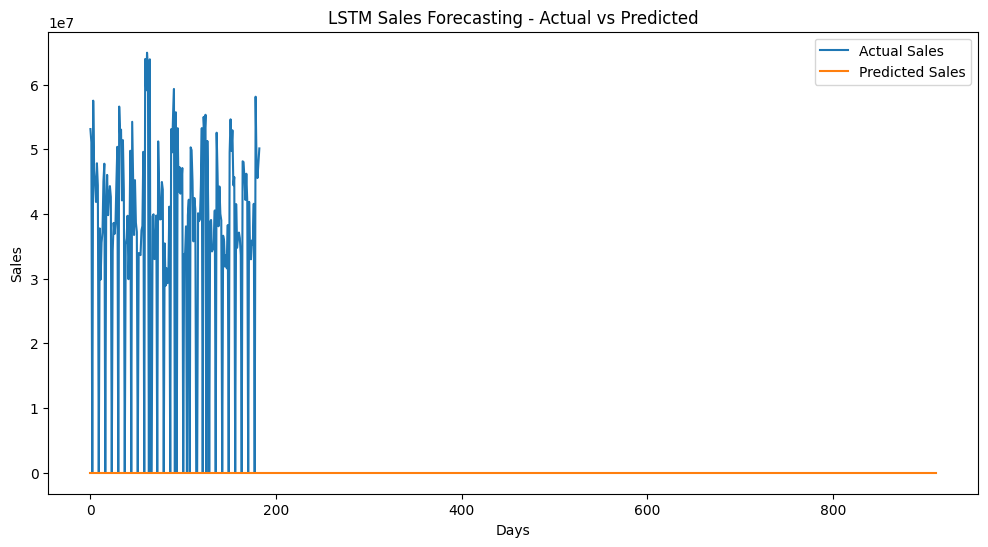

In [ ]:

# Plot actual vs predicted sales
plt.figure(figsize=(12,6))
plt.plot(y_test, label="Actual Sales")
plt.plot(y, label="Predicted Sales")
plt.xlabel("Days")
plt.ylabel("Sales")
plt.legend()
plt.title("LSTM Sales Forecasting - Actual vs Predicted")
plt.show()


# The plot helps us visually compare the actual sales data against the predicted sales from the LSTM model.
- X-axis (Days) → Represents time .
- Y-axis (Sales) → Represents sales values.
- Blue Line (Actual Sales) → The real sales data from the dataset.
- Red Dashed Line (Predicted Sales) → The sales values predicted by the LSTM model


In [2]:
import gzip
import shutil

def compress_file(input_file):
    output_file =input_file + ".gz"
    with open(input_file, 'rb') as f_in:
        with gzip.open(output_file, 'wb')as f_out:
            shutil.copyfileobj(f_in,f_out)
            print(f"compressed {input_file} to {output_file}")

files = ["sample_submission.csv", "store.csv", "test.csv", "train.csv"]
for file in files:
    compress_file(file)            

compressed sample_submission.csv to sample_submission.csv.gz
compressed store.csv to store.csv.gz
compressed test.csv to test.csv.gz
compressed train.csv to train.csv.gz
